# Creating a timeseries gif using Landsat Satelite images

# Searching for scenes

In [1]:
from landsatxplore.api import API
import os

# Your USGS  credentials
username = os.environ.get('USGS_USERNAME')
password = os.environ.get('USGS_PASSWORD')

# Initialize a new API instance
api = API(username, password)

# Perform a request
response = api.request(endpoint="dataset-catalogs")
print(response)

{'EE': 'EarthExplorer', 'GV': 'GloVis', 'HDDS': 'HDDS Explorer'}


In [2]:
results = []

# Datasets for Landsat 5, 7, 8 and 9
datasets = ["landsat_tm_c2_l2", "landsat_etm_c2_l2", "landsat_ot_c2_l2"]

for dataset in datasets:
    scenes = api.search(
        
        dataset=dataset,
        latitude=-33.728365,
        longitude=18.464116,
        start_date='1980-01-01',
        end_date='2022-12-31',
        max_cloud_cover=100,
        max_results=10000
    )

    results.extend(scenes)

    print(len(results))

227
564
1035


In [3]:
import pandas as pd

# Create a DataFrame from the scenes
df_scenes = pd.DataFrame(results)

# Get scene tier 
df_scenes['tier'] = [int(x[-1]) for x in df_scenes["display_id"]]

# Get satellite
df_scenes['satellite'] = [int(str(x)[-1]) for x in df_scenes['satellite']]

# Get necessary columns
df_scenes = df_scenes[['display_id','wrs_path', 'wrs_row','satellite','cloud_cover','tier','acquisition_date']]
df_scenes.columns = ['id','path', 'row','satellite','cloud_cover','tier','date']

# Get year and month
df_scenes['year'] = pd.to_datetime(df_scenes['date']).dt.year
df_scenes['month'] = pd.to_datetime(df_scenes['date']).dt.month

df_scenes.sort_values('date', ascending=True, inplace=True)

df_scenes.to_csv('landsat_scenes_sa.csv', index=False)
df_scenes.head()

,id,path,row,satellite,cloud_cover,tier,date,year,month
226,LT05_L2SP_175083_19840609_20200918_02_T1,175,83,5,6,1,1984-06-09,1984,6
225,LT05_L2SP_175083_19840929_20200918_02_T1,175,83,5,63,1,1984-09-29,1984,9
224,LT05_L2SP_175083_19841015_20200918_02_T1,175,83,5,11,1,1984-10-15,1984,10
223,LT05_L2SP_175083_19850409_20200918_02_T1,175,83,5,1,1,1985-04-09,1985,4
222,LT05_L2SP_175083_19861106_20200917_02_T1,175,83,5,3,1,1986-11-06,1986,11


In [1]:
import pandas as pd

df_scenes = pd.read_csv('landsat_scenes_sa.csv')

#only summer months
df_scenes = df_scenes[(df_scenes.month >=10) | (df_scenes.month <=3)]

# only tier 1
df_scenes = df_scenes[df_scenes.tier == 1]

# only tile (175, 83)
df_scenes = df_scenes[df_scenes.row == 83]

# before 31 May 2003 for landsat 7 
df_scenes = df_scenes[(df_scenes.satellite != 7) | (df_scenes.date < '2003-05-31')]

# no landsat 4
df_scenes = df_scenes[df_scenes.satellite != 4]

#sort by cloud cover and month
df_scenes = df_scenes.sort_values(['year','cloud_cover'], ascending=True)

# get first entry for each year
df_scenes = df_scenes.groupby('year').first().reset_index()

print(len(df_scenes))

df_scenes.head(100)

34


,year,id,path,row,satellite,cloud_cover,tier,date,month
0,1984,LT05_L2SP_175083_19841015_20200918_02_T1,175,83,5,11,1,1984-10-15,10
1,1986,LT05_L2SP_175083_19861224_20200917_02_T1,175,83,5,2,1,1986-12-24,12
2,1987,LT05_L2SP_175083_19870109_20201014_02_T1,175,83,5,5,1,1987-01-09,1
3,1989,LT05_L2SP_175083_19890303_20200916_02_T1,175,83,5,0,1,1989-03-03,3
4,1990,LT05_L2SP_175083_19901016_20200915_02_T1,175,83,5,0,1,1990-10-16,10
5,1991,LT05_L2SP_175083_19910325_20200915_02_T1,175,83,5,0,1,1991-03-25,3
6,1992,LT05_L2SP_175083_19920107_20200914_02_T1,175,83,5,0,1,1992-01-07,1
7,1993,LT05_L2SP_175083_19930125_20200914_02_T1,175,83,5,0,1,1993-01-25,1
8,1994,LT05_L2SP_175083_19941214_20200913_02_T1,175,83,5,5,1,1994-12-14,12
9,1995,LT05_L2SP_175083_19951030_20200912_02_T1,175,83,5,0,1,1995-10-30,10


# Downloading scenes 

In [ ]:
from landsatxplore.earthexplorer import EarthExplorer
import os

# Initialize the API
ee = EarthExplorer(username, password)

# Select the first scene
for i,ID in enumerate(df_scenes.id):

    print("year: {} | ID: {}".format(df_scenes.year[i],ID))

    # Download the scene 
    try: 
        ee.download(ID, output_dir='./data')
        print('{} succesful'.format(ID))
        
    # Additional error handling
    except:
        if os.path.isfile('./data/{}.tar'.format(ID)):
            print('{} error but file exists'.format(ID))
        else:
            print('{} error'.format(ID))

    print()

ee.logout()

In [5]:
# Check that all files have been downloaded
for i,ID in enumerate(df_scenes.id):
    if os.path.isfile('./data/{}.tar'.format(ID)):
        print("year: {} succesful".format(df_scenes.year[i]))
    else:
        print("year: {} error".format(df_scenes.year[i]))

year: 1984 succesful
year: 1986 succesful
year: 1987 succesful
year: 1989 succesful
year: 1990 succesful
year: 1991 succesful
year: 1992 succesful
year: 1993 succesful
year: 1994 succesful
year: 1995 succesful
year: 1996 succesful
year: 1997 succesful
year: 1998 succesful
year: 1999 succesful
year: 2000 succesful
year: 2001 succesful
year: 2002 succesful
year: 2003 succesful
year: 2004 succesful
year: 2005 succesful
year: 2006 succesful
year: 2007 succesful
year: 2008 succesful
year: 2011 succesful
year: 2013 succesful
year: 2014 succesful
year: 2015 succesful
year: 2016 succesful
year: 2017 succesful
year: 2018 succesful
year: 2019 succesful
year: 2020 succesful
year: 2021 succesful
year: 2022 succesful


In [9]:
import tarfile

for ID in df_scenes.id:
    # Extract files from tar archive
    tar = tarfile.open('./data/{}.tar'.format(ID))
    tar.extractall('./data/{}'.format(ID))
    tar.close()

# Explore landsat scenes

In [2]:
import tifffile as tiff
import numpy as np


def get_rgb(ID):
    
    # Load Blue (B2), Green (B3) and Red (B4) bands

    if ID[0:4] in ['LT05','LE07']:
        # Landsat 5 and 7
        R = tiff.imread('./data/{}/{}_SR_B3.TIF'.format(ID, ID))
        G = tiff.imread('./data/{}/{}_SR_B2.TIF'.format(ID, ID))
        B = tiff.imread('./data/{}/{}_SR_B1.TIF'.format(ID, ID))
    else:
        # Landsat 8 and 9
        R = tiff.imread('./data/{}/{}_SR_B4.TIF'.format(ID, ID))
        G = tiff.imread('./data/{}/{}_SR_B3.TIF'.format(ID, ID))
        B = tiff.imread('./data/{}/{}_SR_B2.TIF'.format(ID, ID))

    # Stack and scale bands
    RGB = np.dstack((R, G, B))
    RGB = np.clip(RGB*0.0000275-0.2, 0, 1)

    # Clip to enhance contrast
    RGB = np.clip(RGB,0,0.3)/0.3
    
    return RGB

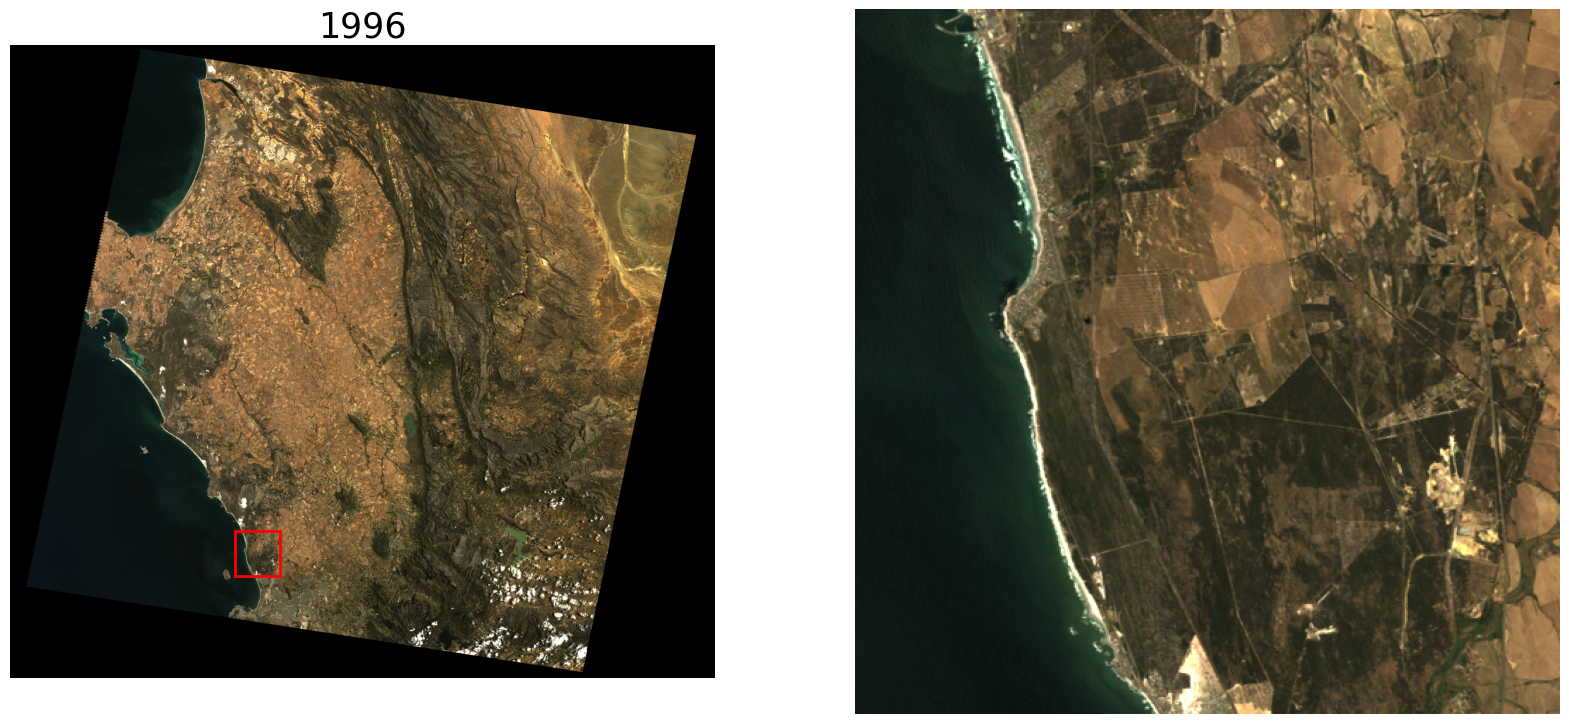

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1,2,figsize=(20, 20))

# Add circle to image at pixel coordinates
rgb = get_rgb(df_scenes.id[10])
ax[0].imshow(rgb)
ax[0].set_title(df_scenes.year[10],size=25)

# Outline area of interest
x,y,h,w = 2500,5400,500,500
rect = mpl.patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='r',facecolor='none')

ax[0].add_patch(rect)

# Crop area of interest
crop_rgb = rgb[y:y+h, x:x+w]

ax[1].imshow(crop_rgb)

ax[0].set_axis_off()
ax[1].set_axis_off()

# Creating timeseries gif 

In [5]:
import rasterio as rio

ID = df_scenes.id[10]
band = rio.open('./data/{}/{}_SR_B3.TIF'.format(ID, ID))

# Get utm coordinates from pixel
utmx, utmy = band.xy(y,x)
print(utmx, utmy)

259200.0 -3729000.0


In [6]:
images = []

for ID in df_scenes.id:

    # Get RGB image
    rgb = get_rgb(ID)

    # Get pixel coordinates of area of interest
    band = rio.open('./data/{}/{}_SR_B3.TIF'.format(ID, ID))
    y,x = band.index(utmx,utmy)

    # Crop area of interest
    crop_rgb = rgb[y:y+h, x:x+w]

    images.append(crop_rgb)

MovieWriter Pillow unavailable; using Pillow instead.


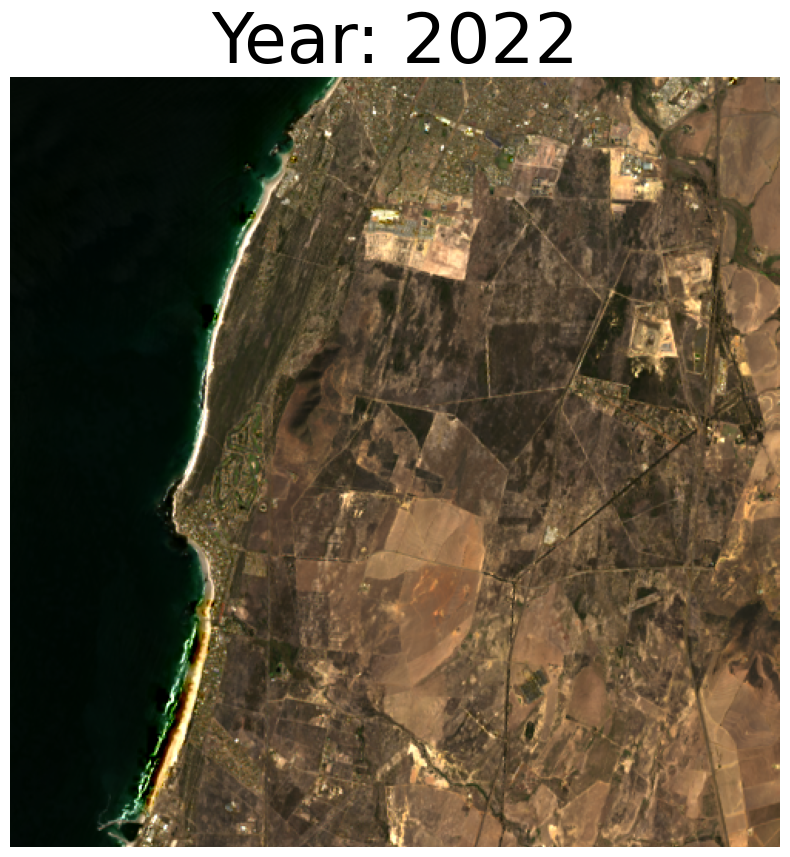

In [10]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(0, w), ylim=(0, h))

def animate(i):
    """Returns the i-th frame of the animation"""

    ax.imshow(images[i])

    title = "Year: {}".format(df_scenes.year[i])
    ax.set_title(title,size = 50)
    ax.set_axis_off()

    return ax

anim = animation.FuncAnimation(fig, animate, frames=len(images), interval=1000)
anim.save('./data/landsat_timeseries_southafrica.gif', writer='Pillow')